<a href="https://colab.research.google.com/github/rajveer0104/MLlearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

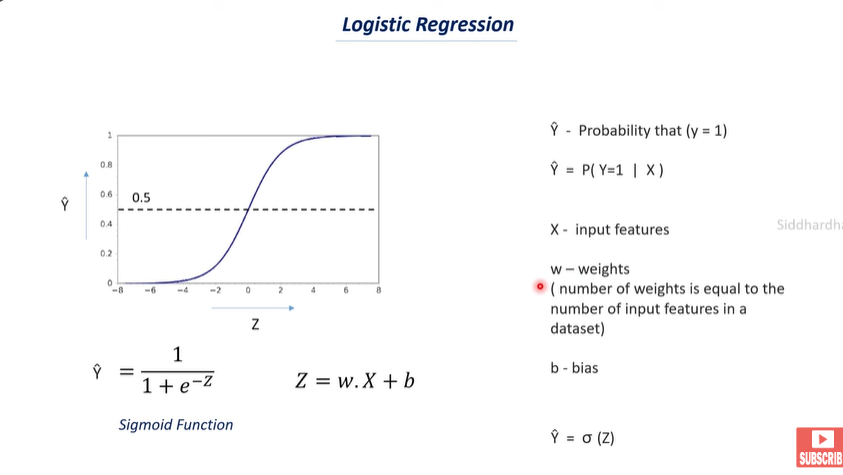

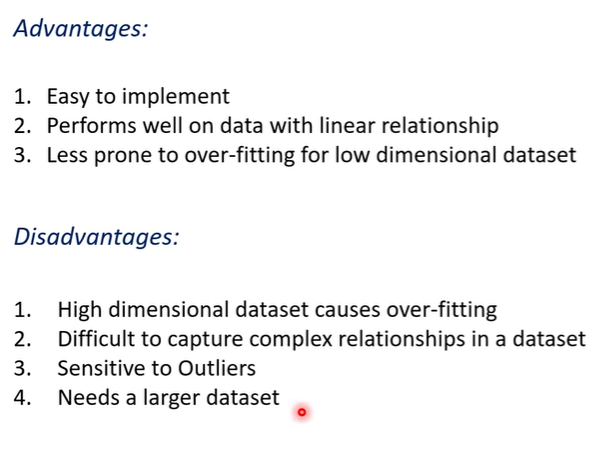

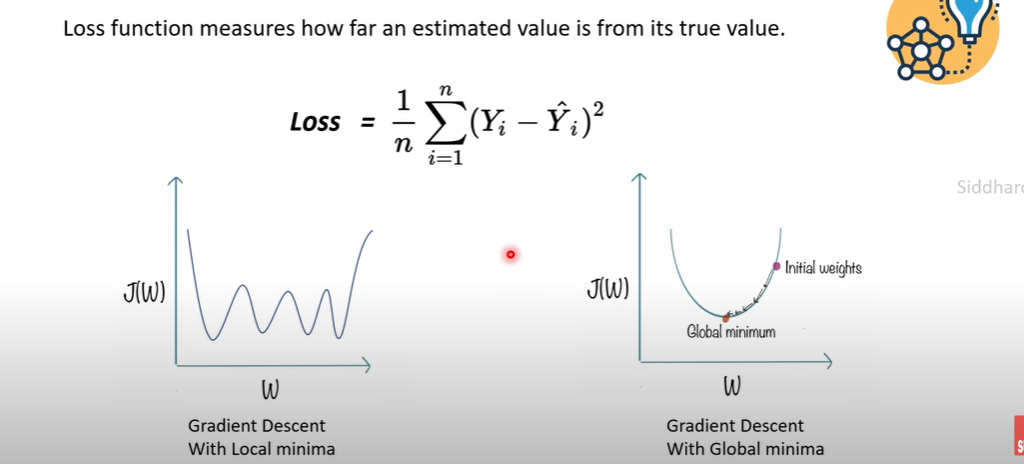

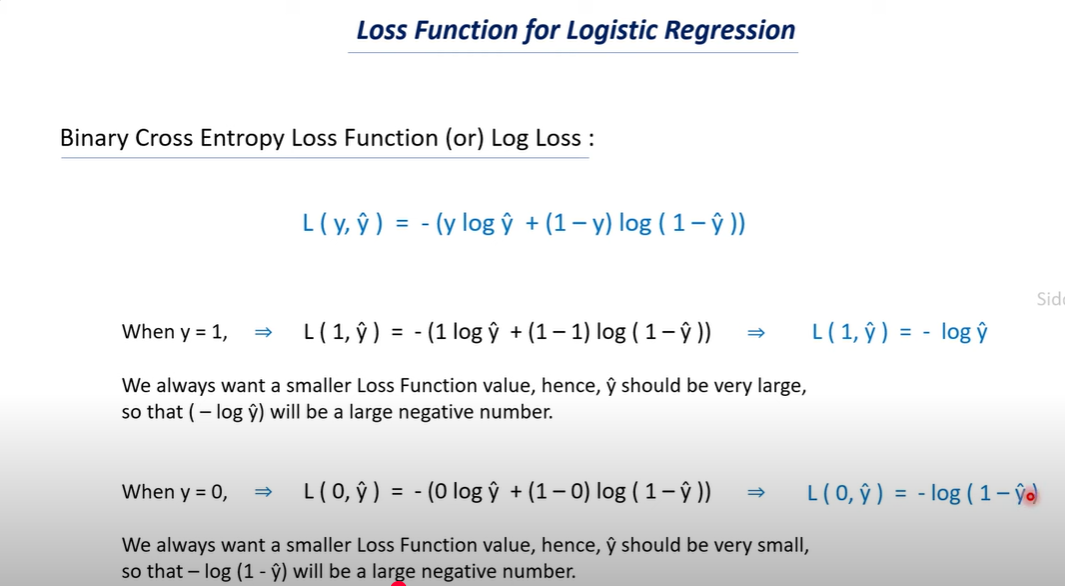

Loss function(L) mainly applies for a single training set as compared to cost function(J) which deals with penalty for a number of training sets or the complete batch

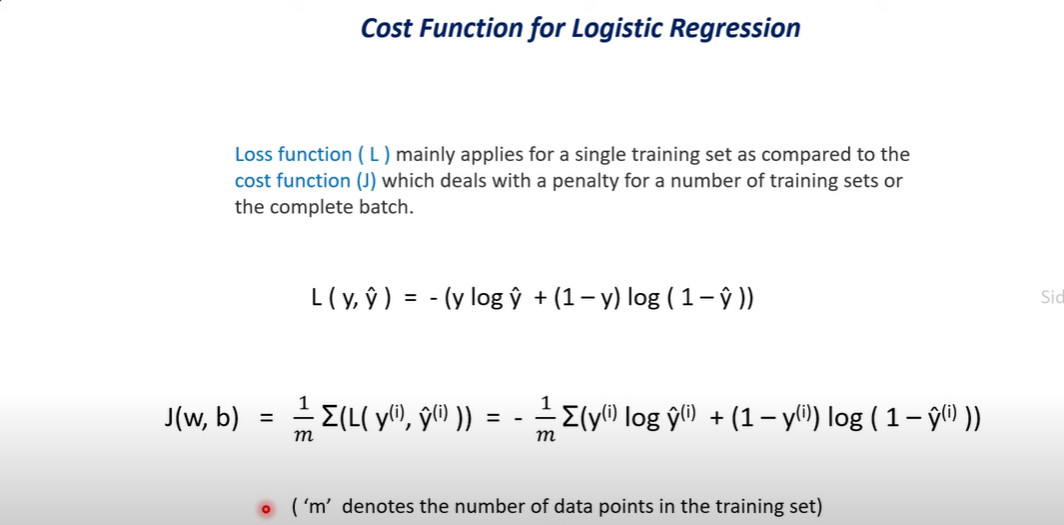

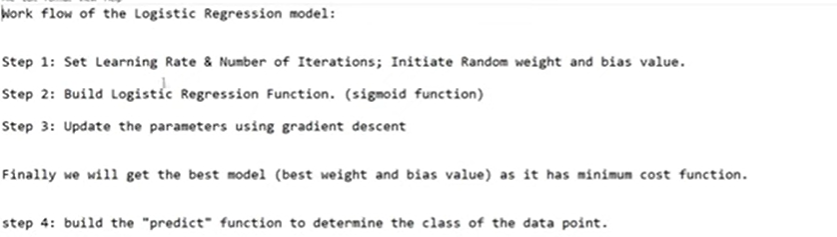

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Logistic regression


In [ ]:
class LogisticRegression():
  def __init__(self,learning_rate,no_of_iteration):
    self.learning_rate=learning_rate
    self.no_of_iteration=no_of_iteration

#m==>> number of datapoints
#n==>> number of input features
  def fit(self,X,Y):
    self.m,self.n=X.shape

    #initiating weight and bias value
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    #implementing gradient descent
    for i in range(self.no_of_iteration):
      self.update_weights()

  def update_weights(self):
    #Y cap formula(sigmoid one )
    Y_cap=1/(1+np.exp(-(self.X.dot(self.w) + self.b))) #wx+b
    #derivatives
    dw=(1/self.m)*np.dot(self.X.T,(Y_cap-self.Y))
    db=1/self.m*np.sum(Y_cap-self.Y)

    #updating weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  #decision boundary and sigmoid equation
  def predict(self,X):
    Y_pred=1/(1+np.exp(-(X.dot(self.w)+self.b)))
    Y_pred=np.where(Y_pred>0.5,1,0)
    return Y_pred

In [ ]:
 # loading the diabetes dataset
 diabetes=pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
features=diabetes.drop(columns="Outcome",axis=1)
target=diabetes["Outcome"]

In [ ]:
print(features)
print("......")
print(target)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

Data standardization

In [ ]:
scaler=StandardScaler()

In [ ]:
standardized_data=scaler.fit_transform(features)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
 features=standardized_data

Train Test split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=2)

Model training

In [ ]:
logistic=LogisticRegression(learning_rate=0.01,no_of_iteration=10000)

In [ ]:
logistic.fit(X_train,Y_train)

In [ ]:
X_train_prediction=logistic.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(training_data_accuracy)

0.7801302931596091


In [ ]:
input=[6,148,72,35,0,33.6,0.627,50]
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
std_data=scaler.transform(input_reshaped)
print(std_data)
prediction=logistic.predict(std_data)
print(prediction)

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
